In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from RecUnet_all import *
from train_RecUnet_all import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


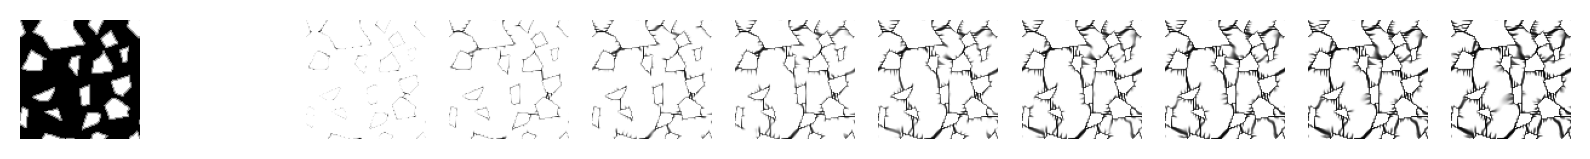

In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 4)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [3]:
args = {'lr' : 0.0001, 'epochs' : 10, 'dev' : dev, 'name' : 'RecUnet_all'}

In [4]:
unet = RecUNet()

In [5]:
unet = load_network(unet, args['name']+'_0', args)

In [6]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  44229.0257505104
Epoch: 0 batch: 100 mean train loss:  43046.3373428881
Epoch: 0 batch: 200 mean train loss:  43131.8639503401
Epoch: 0 batch: 300 mean train loss:  44985.6396926343
Epoch: 0 batch: 400 mean train loss:  42139.8109384030
Epoch: 0 batch: 500 mean train loss:  48535.4009377174


KeyboardInterrupt: 

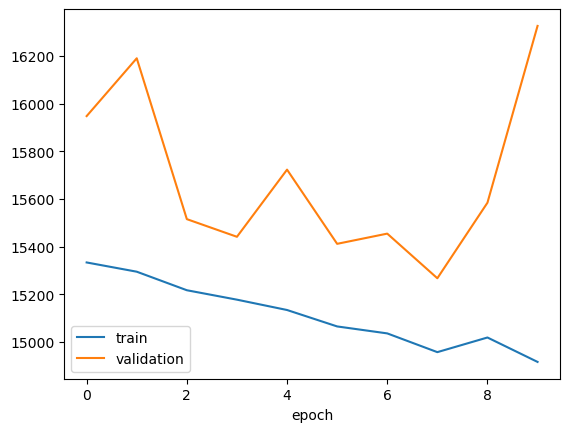

In [ ]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])